As a research of bird behavior I am tracking birds with accelerometers using the https://uva-bits.nl system. To study the birds energy usage I want to create a machine learning model. To train this model I need some artificial data. 

# Real data set

The https://github.com/NLeSC/eEcology-Annotation-UI/raw/master/demo/tracker.json was derived from the uva-bits database of tracker 355 on 2010-06-28.

<class 'pandas.core.frame.DataFrame'>
Float64Index: 40 entries, 0.0 to 1.95
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       40 non-null     float64
 1   y       40 non-null     float64
 2   z       40 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


<AxesSubplot:>

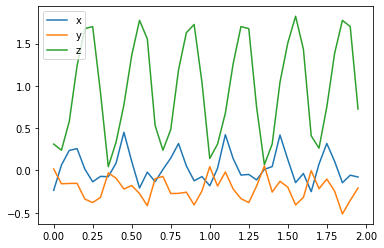

In [12]:
import json
import urllib.request
import pandas as pd

with urllib.request.urlopen('https://github.com/NLeSC/eEcology-Annotation-UI/raw/master/demo/tracker.json') as f:
    data = json.load(f)

frame = 34
df = pd.DataFrame({
    'x': data[frame]['x_acceleration'],
    'y': data[frame]['y_acceleration'], 
    'z': data[frame]['z_acceleration']}, 
    index=data[frame]['time_acceleration']
)
df.info()
df.plot()

# Let us recreate this with sequgen

In [56]:
import numpy as np
from sequgen.deterministic.sine import sine
from sequgen.deterministic.constant import constant

In [79]:
t_predict = np.linspace(0, 2, 40) # 2 seconds of 20Hz

In [80]:
x = sine(t_predict, wavelength=2/6, amplitude=0.25, phase_shift=0.25) + \
    sine(t_predict, wavelength=2/6, amplitude=0.1, phase_shift=0.1) + \
    constant(t_predict, -0.2)

In [81]:
z = sine(t_predict, 
         wavelength=2/6, # 6 flaps in 2 seconds
         amplitude=1, 
         phase_shift=0.05) + constant(t_predict, 1) # add Earths gravity

In [82]:
y = sine(t_predict, wavelength=2/6, amplitude=0.25, phase_shift=0.05) + \
    sine(t_predict, wavelength=2/6, amplitude=0.1, phase_shift=0.2)

<AxesSubplot:>

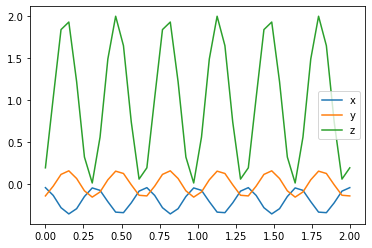

In [83]:
pd.DataFrame({'x':x, 'y':y, 'z': z}, index=t_predict).plot()